1. CÀI ĐẶT THƯ VIỆN

In [ ]:
pip install imageio

In [ ]:
pip install scipy

In [ ]:
pip install scikit-image

2.1 NẠP ẢNH SỬ DỤNG THƯ VIỆN PIL (PYTHON IMAGINE LIBRARY)

In [7]:
from PIL import Image
import numpy as np
img= Image.open('bird.png')
img.show()

2.2 NẠP ẢNH SỬ DỤNG THƯ VIỆN IMAGEIO

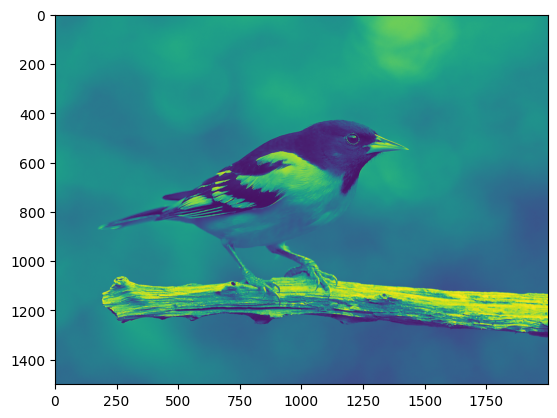

In [8]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('bird.png', mode='F')
plt.imshow (data)
plt.show()

2.3 ĐỘ PHÂN GIẢI ẢNH

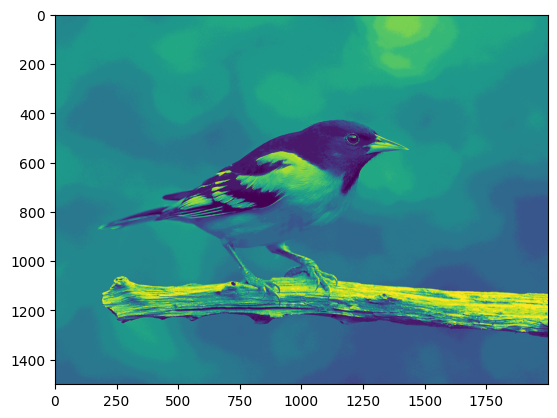

In [9]:
data = iio.imread('bird.png', mode='F').astype(np.uint8)
cl = data & 0xF0
iio.imsave ('birdfo.png', cl)
tmp = iio.imread('birdfo.png')
plt.imshow (tmp)
plt.show()


2.4 MÀU SẮC VỚI HỆ RGB

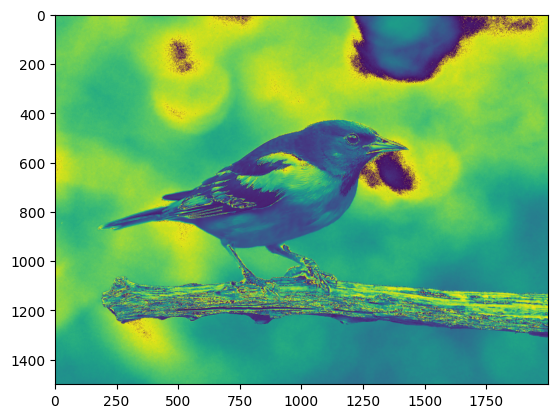

In [10]:
data = iio.imread('bird.png')
bdata = (data[:,:,1] + data[:,:,2])
plt.imshow (bdata)
plt.show()

2.5 MÀU SẮC VỚI HỆ HSV

In [11]:
import colorsys
a = colorsys.rgb_to_hsv (255, 0, 0)
print (a)
b= colorsys.rgb_to_hsv (1, 0, 0)
print (b)
c =colorsys.rgb_to_hsv (0, 255, 0)
print (c)
d = colorsys.hsv_to_rgb (1, 1, 255)
print (d)

(0.0, 1.0, 255)
(0.0, 1.0, 1)
(0.3333333333333333, 1.0, 255)
(255, 0.0, 0.0)


2.6 ỨNG DỤNG CHUYỂN ĐỔI HỆ MÀU

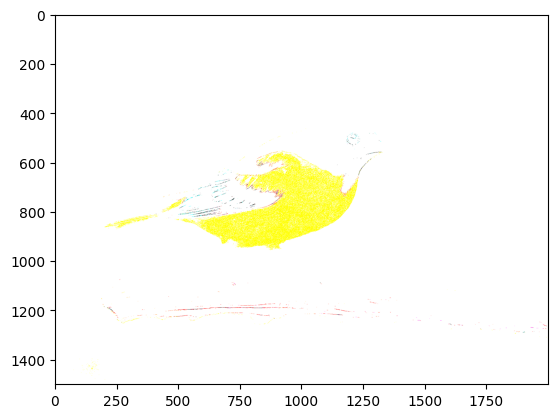

In [12]:
rgb = iio.imread('bird.png')
rgb2hsv = np.vectorize (colorsys.rgb_to_hsv)
h, s, v= rgb2hsv (rgb [:,:,0], rgb [:,:,1], rgb[:,:,2])
h*= h
hsv2rgb = np.vectorize (colorsys.hsv_to_rgb)
rgb2 = hsv2rgb (h, s, v)
rgb2= np.array (rgb2).transpose((1, 2, 0))
plt.imshow(rgb2)
plt.show()

2.7 LỌC ẢNH

VỚI MEAN FILTER

[[119 119 119 ... 132 131 131]
 [119 119 119 ... 131 131 131]
 [120 120 119 ... 132 132 131]
 ...
 [ 89  89  89 ...  80  80  80]
 [ 89  89  89 ...  80  80  80]
 [ 90  89  89 ...  80  80  80]]


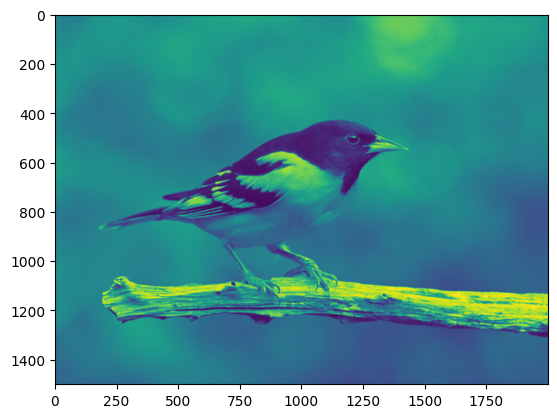

In [13]:
import scipy.ndimage as sn
a = iio.imread('bird.png', mode='F')
k = np.ones((5,5))/25
b = sn.convolve(a, k) .astype (np. uint8)
iio.imsave('bird_mean_filter.png', b)
print (b)
plt.imshow (b)
plt.show()

VỚI MEDIAN FILTER

[[118 118 118 ... 131 131 131]
 [118 118 119 ... 131 131 131]
 [119 119 119 ... 132 131 131]
 ...
 [ 89  88  88 ...  81  81  81]
 [ 89  88  88 ...  80  81  81]
 [ 89  88  89 ...  80  80  81]]


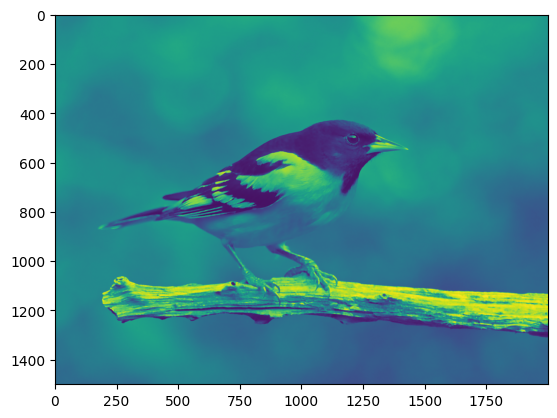

In [14]:
a = iio.imread('bird.png', mode='F').astype (np. uint8)
b = sn.median_filter (a, size=5, footprint=None, output=None, mode='reflect', cval=0.0, origin=0)
iio.imsave('bird_median_filter.png', b)
#b is converted from an ndarray to an image
print (b)
plt.imshow(b)
plt.show()

VỚI MAX FILTER

[[121 121 121 ... 138 138 138]
 [128 128 128 ... 138 138 138]
 [128 128 128 ... 138 138 138]
 ...
 [ 96  96  96 ...  83  83  83]
 [ 96  96  96 ...  83  83  83]
 [ 96  96  96 ...  83  83  83]]


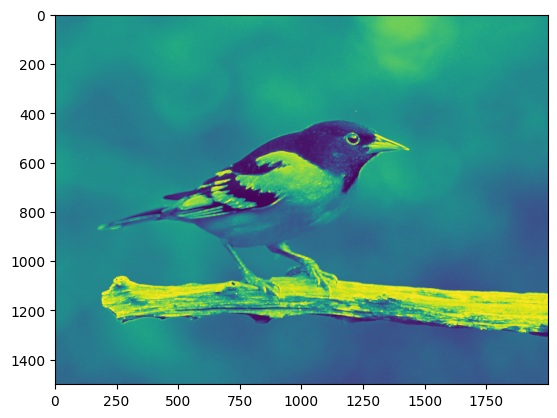

In [15]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pylab as plt
import colorsys
a = iio.imread('bird.png', mode='F').astype(np.uint8)
b = sn.maximum_filter(a, size=5, footprint=None, output=None, mode='reflect', cval=0.0, origin=0)
iio.imsave('bird_max_filter.png', b)
print (b)
plt.imshow (b)
plt.show()

VỚI MIN FILTER

[[117 117 117 ... 127 127 127]
 [113 113 113 ... 127 127 127]
 [113 113 113 ... 127 127 127]
 ...
 [ 85  85  85 ...  76  76  76]
 [ 85  85  85 ...  76  76  76]
 [ 85  85  85 ...  78  78  78]]


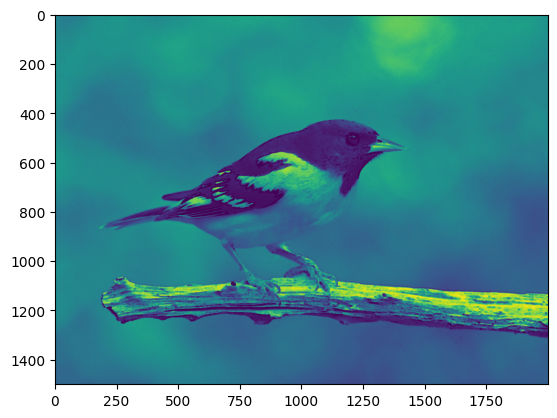

In [17]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pylab as plt
import colorsys
a = iio.imread('bird.png', mode='F').astype (np. uint8)
b = sn.minimum_filter(a, size=5, footprint=None, output=None, mode='reflect', cval = 0.0, origin=0)
iio.imsave('bird_min_filter.png', b)
print (b)
plt.imshow (b)
plt.show()

2.8 DÒ CẠNH BIÊN CỦA ẢNH

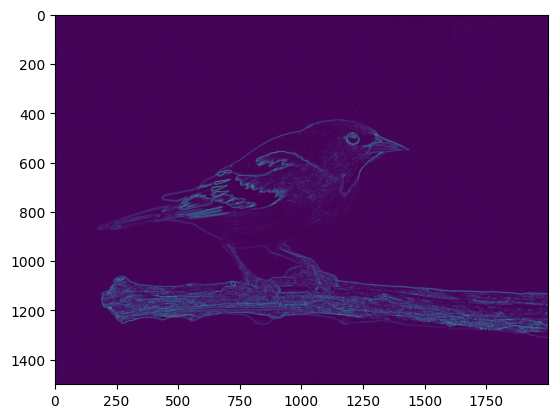

In [19]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
from skimage import filters
import matplotlib.pylab as plt
import colorsys
a = iio.imread('bird.png', mode='F')
b= filters.sobel (a).astype (np. uint8)
iio.imsave('bird_sobel_filter_edge_detection.png', b)
plt.imshow(b)
plt.show()

SỬ DỤNG PREWITT FILTER

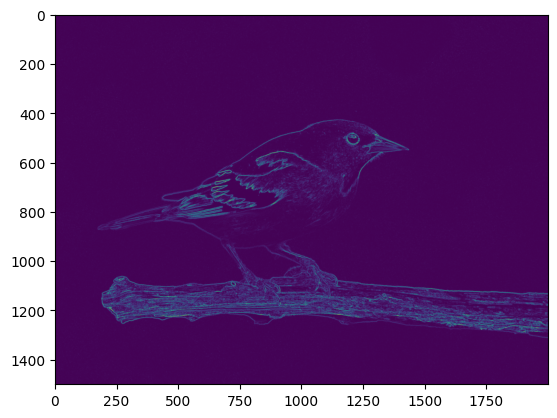

In [21]:
a = iio.imread('bird.png', mode='F')
b = filters.prewitt (a).astype (np. uint8)
iio.imsave('bird_prewitt_filter_edge_detection.png', b)
plt.imshow(b)
plt.show()

SỬ DỤNG CANNY FILTER

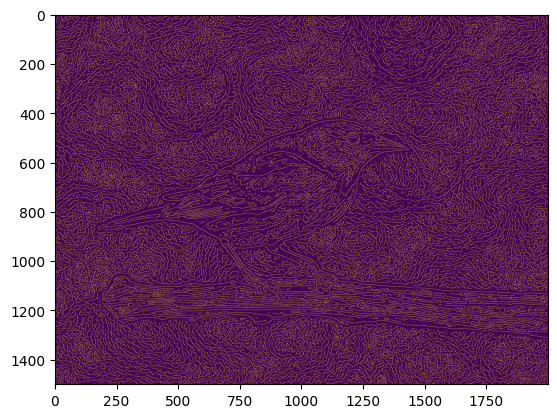

In [24]:
from skimage import feature
a = iio.imread('bird.png', mode='F')
b = feature.canny (a, sigma=3).astype(np. uint8)
iio.imsave('bird_canny_filter_edge_detection.png', b)
plt.imshow(b)
plt.show()

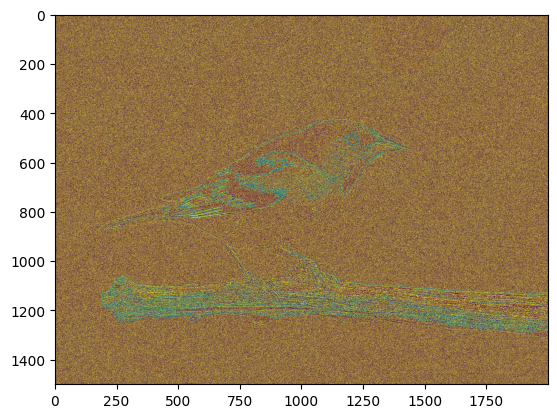

In [26]:
a = iio.imread('bird.png', mode='F')
b = sn.laplace(a, mode='reflect').astype(np. uint8)
iio.imsave('bird_laplace_filter_edge_detection.png', b)
plt.imshow(b)
plt.show()